In [35]:
import xarray as xr
import pandas as pd
import numpy as np
from cast_to_xarray import *
from saturation_ox import *
from extract_CTD_ox import *

# Load the CTD data

In [36]:
data_dir = 'data_cruise1'

cast4 = cast_to_xarray(data_dir+'/Station4_TSwift_loop_filter_teos10_bin.cnv', 'S4')
cast5 = cast_to_xarray(data_dir+'/Station5_loop_filter_teos10_bin.cnv', 'S5')
castWF = cast_to_xarray(data_dir+'/StationWF_loop_filter_teos10_bin.cnv', 'WF')
castRACE = cast_to_xarray(data_dir+'/TheRace_loop_filter_teos10_bin.cnv', 'RACE')

# Calculate saturation oxygen, add to array
## absolute salinity and conservative temperature are also added

In [37]:
cast4 = saturation_ox(cast4)
cast5 = saturation_ox(cast5)
castRACE = saturation_ox(castRACE)
castWF = saturation_ox(castWF)

#cast4

# Load the Winkler data

In [38]:
# load in the Winkler oxygen data
# problem: don't have info to match trip depth from seabird files
DO_winklerpd = pd.read_csv('../O2calib/Cruise1Winkler.csv')

# conver to xarray
DO_winkler = DO_winklerpd.set_index('Station').to_xarray()

# ** remember to upload Winkler oxygen data
#DO_winkler

# Extract CTD data at Winkler depths

In [39]:
extr4, sat4=extract_CTD(cast4, DO_winkler, '4')
extr5, sat5=extract_CTD(cast5, DO_winkler, '5')
extrRACE, satRACE=extract_CTD(castRACE, DO_winkler, 'RACE')
extrWF, satWF=extract_CTD(castWF, DO_winkler, 'WF')

In [41]:
# dropped the first value from station 4 because CTD is super low
extr4

[220.325, 217.921, 213.612, 211.012]

# Calculate R squared

In [47]:
# needed to concatenate list in same order as Winkler
extr_all=extrRACE+extr5+extrWF+extr4

correlation_matrix = np.corrcoef(DO_winkler.Oxygen.values, extr_all)
correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2

print(r_squared)
# something is wrong

0.9146484286095855


# Plot oxygen
## color by depth
## add saturation concentration

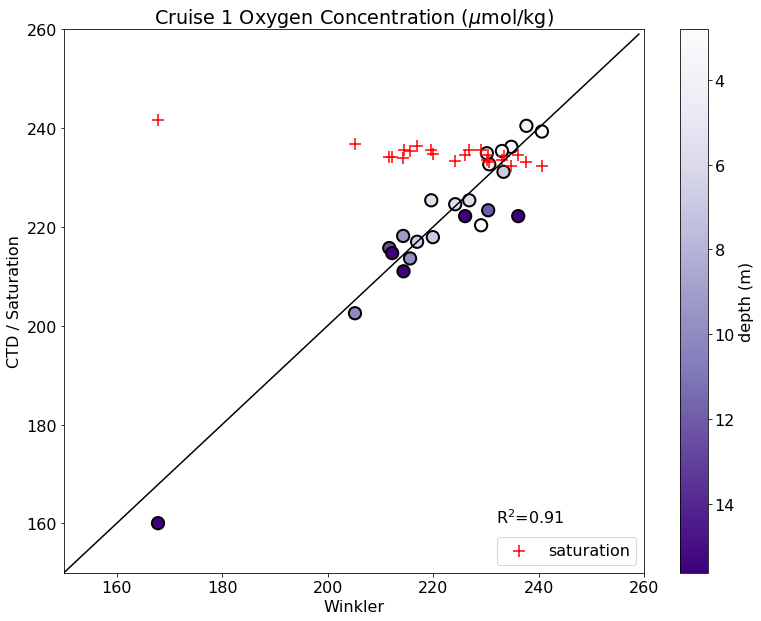

In [107]:
plt.figure(figsize=(13,10))
plt.rcParams.update({'font.size': 16})

datamin = 150
datamax = 260

x=np.arange(datamin, datamax, 1)
plt.plot(x, x, c='k')

plt.scatter(DO_winkler.sel(Station='RACE').Oxygen.values, extrRACE, marker='o', s=150, linewidths=2,
            c=DO_winkler.sel(Station='RACE').Depth.values, cmap=plt.cm.Purples, edgecolors='k')
plt.scatter(DO_winkler.sel(Station='WF').Oxygen.values, extrWF, marker='o', s=150, linewidths=2,
            c=DO_winkler.sel(Station='WF').Depth.values, cmap=plt.cm.Purples, edgecolors='k')
plt.scatter(DO_winkler.sel(Station='4').Oxygen.values, extr4, marker='o', s=150, linewidths=2,
            c=DO_winkler.sel(Station='4').Depth.values, cmap=plt.cm.Purples, edgecolors='k')
plt.scatter(DO_winkler.sel(Station='5').Oxygen.values, extr5, marker='o', s=150, linewidths=2,
            c=DO_winkler.sel(Station='5').Depth.values, cmap=plt.cm.Purples, edgecolors='k')
cbar=plt.colorbar()
cbar.set_label('depth (m)')
cbar.ax.invert_yaxis()

# add the saturation concentrations
plt.scatter(DO_winkler.sel(Station='RACE').Oxygen.values, satRACE, marker='+', s=150, linewidths=2,
            c='r', edgecolors='k', label='saturation')
plt.scatter(DO_winkler.sel(Station='WF').Oxygen.values, satWF, marker='+', s=150, linewidths=2,
            c='r', edgecolors='k')
plt.scatter(DO_winkler.sel(Station='4').Oxygen.values, sat4, marker='+', s=150, linewidths=2,
            c='r', edgecolors='k')
plt.scatter(DO_winkler.sel(Station='5').Oxygen.values, sat5, marker='+', s=150, linewidths=2,
            c='r', edgecolors='k')

plt.xlim([datamin, datamax])
plt.ylim([datamin, datamax])

plt.xlabel('Winkler')
plt.ylabel('CTD / Saturation')

plt.legend(loc=4)

#plt.title('Oxygen concentration $\mu mol/kg')
#plt.title(r'$\alpha > \beta$')
plt.title(r'Cruise 1 Oxygen Concentration ($\mu$mol/kg)')

c=round(r_squared,2)
s=str(c)
ss = 'R$^2$='+ s
plt.text(232, 160, ss)

plt.savefig('Figures/O2_QC_sat_cruise1.png')